In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
zoo=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\KNN\Zoo.csv')

## EDA

In [5]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
# describing data
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [13]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [15]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<AxesSubplot:>

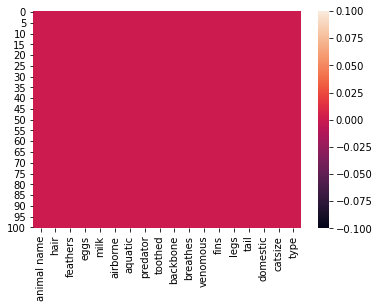

In [7]:
sns.heatmap(zoo.isna())

## Visualization

In [67]:
value_count=zoo['type'].value_counts()
value_count

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:>

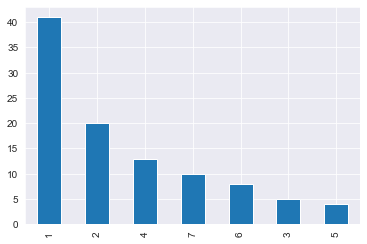

In [68]:
value_count.plot(kind='bar')

#### Animal of Type 1 are high in count. 

<AxesSubplot:>

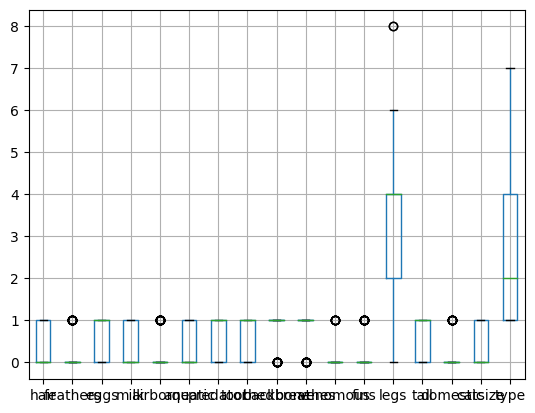

In [16]:
zoo.boxplot()

array([[<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>],
       [<AxesSubplot:title={'center':'catsize'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'feathers'}>],
       [<AxesSubplot:title={'center':'fins'}>,
        <AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'toothed'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'venomous'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

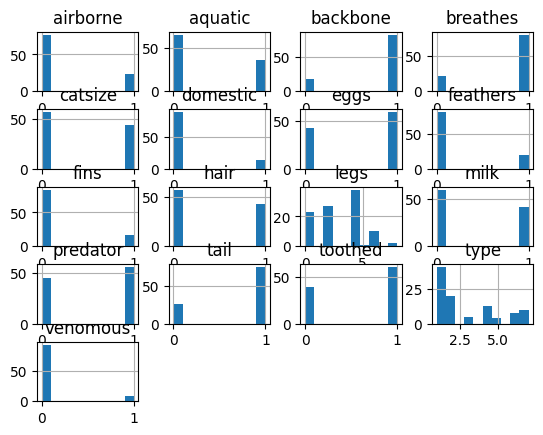

In [17]:
zoo.hist()

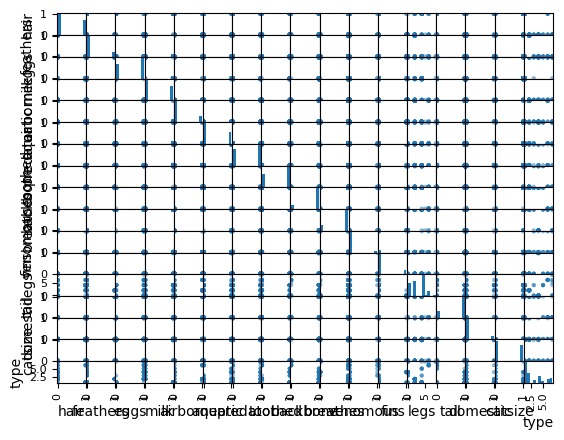

In [18]:
pd.plotting.scatter_matrix(zoo)
plt.show()

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()

In [23]:
x=zoo.iloc[:,:-1]
y=zoo.iloc[:,-1]

In [40]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
oe=OrdinalEncoder()

In [43]:
x['animal name']

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [45]:
x['animal name']=oe.fit_transform(x[['animal name']])

In [46]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1.0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2.0,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96.0,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
x=pd.DataFrame(sc.fit_transform(x))

In [48]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.586903,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.621595,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.656287,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,1.690979,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,random_state=1)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()

In [64]:
knn

KNeighborsClassifier(n_neighbors=20)

In [53]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    trainac=model.score(xtrain,ytrain)
    testac=model.score(xtest,ytest)
    
    print(f"train AC {trainac}\ntest AC {testac}")

In [54]:
predict(KNeighborsClassifier())

train AC 0.9466666666666667
test AC 0.9230769230769231


## Hyperparameter tunning for knn

In [55]:
trainac=[]
testac=[]

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [56]:
trainac

[1.0,
 0.9466666666666667,
 0.96,
 0.9466666666666667,
 0.9466666666666667,
 0.92,
 0.8933333333333333,
 0.9066666666666666,
 0.8666666666666667,
 0.8933333333333333,
 0.88,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.88,
 0.88,
 0.8933333333333333,
 0.88,
 0.8533333333333334,
 0.8533333333333334]

In [57]:
testac

[1.0,
 0.8846153846153846,
 0.9615384615384616,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.8461538461538461,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846]

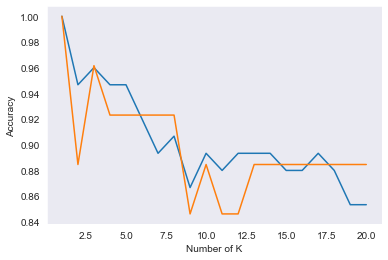

In [58]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [69]:
predict(KNeighborsClassifier(n_neighbors=3))

train AC 0.96
test AC 0.9615384615384616


#### we can select optimum number of k based on above graph